<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Modelling_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Shivani-781/Ganga-Water-Quality-Assessment

Inspired from the above assessment to see how it works on proxy data

Code credits: Shivani Chauhan

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from IPython.display import display
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df


,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [7]:
num = df._get_numeric_data()

In [8]:
num[num<0] = np.nan


In [9]:

df


,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [10]:
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [11]:
pho = df['Phosphate']
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [13]:
for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [14]:
for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [15]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [16]:
ec = df['EC']
ec

0      147.8
1      188.0
2      128.0
3      127.0
4      140.0
       ...  
482    370.0
483    434.0
484    487.0
485    385.0
486    410.8
Name: EC, Length: 487, dtype: float64

In [17]:
ec.shape

(487,)

In [18]:
ec_pdf = np.zeros([487,1])

In [19]:
mu = np.mean(ec)
sigma = np.std(ec)

In [20]:
for i in range(0, 487):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ec[i] - mu)/sigma, 2)/2)
    ec_pdf[i] = x

In [21]:
ec_pdf

array([[4.10955817e-03],
       [4.89764184e-03],
       [3.44313247e-03],
       [3.40709722e-03],
       [3.86030615e-03],
       [4.62860409e-03],
       [4.05626533e-03],
       [4.23408026e-03],
       [4.84624881e-03],
       [4.90405411e-03],
       [4.83515618e-03],
       [3.65577177e-03],
       [4.08501295e-03],
       [4.02257251e-03],
       [4.02341043e-06],
       [4.81084704e-03],
       [4.32021402e-03],
       [4.32021402e-03],
       [4.47486079e-03],
       [4.85735799e-03],
       [4.81084704e-03],
       [4.89141992e-03],
       [4.83599210e-03],
       [4.78374312e-03],
       [4.87521978e-03],
       [3.75922435e-03],
       [4.44859111e-03],
       [4.81084704e-03],
       [3.62082038e-03],
       [4.87521978e-03],
       [3.37092535e-03],
       [4.11565477e-03],
       [3.40709722e-03],
       [4.23408026e-03],
       [4.62860409e-03],
       [2.71015678e-03],
       [2.85696031e-03],
       [4.79764150e-03],
       [4.62860409e-03],
       [4.05398140e-03],


Text(0, 0.5, 'EC_PDF')

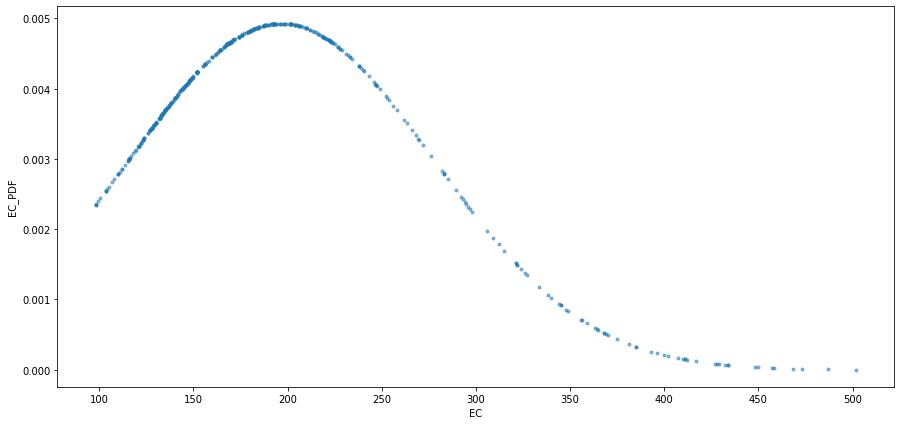

In [22]:
plt.figure(figsize = (15,7))
plt.scatter(ec, ec_pdf, alpha = 0.5, marker = '.')
plt.xlabel('EC')
plt.ylabel('EC_PDF')

Text(0, 0.5, 'pH_PDF')

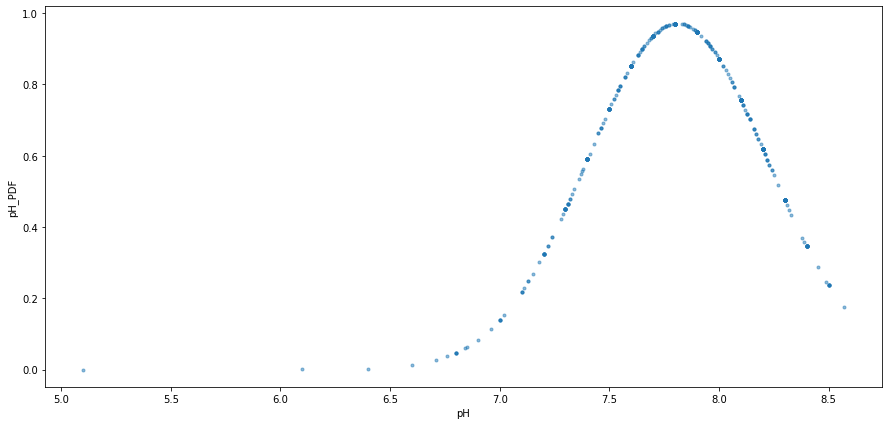

In [23]:
ph = df['pH']
ph_pdf = np.zeros([487,1])
mu = np.mean(ph)
sigma = np.std(ph)
for i in range(0, 487):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf[i] = x
plt.figure(figsize = (15,7))
plt.scatter(ph, ph_pdf, alpha = 0.5, marker = '.')
plt.xlabel('pH')
plt.ylabel('pH_PDF')

Text(0, 0.5, 'WPI_PDF')

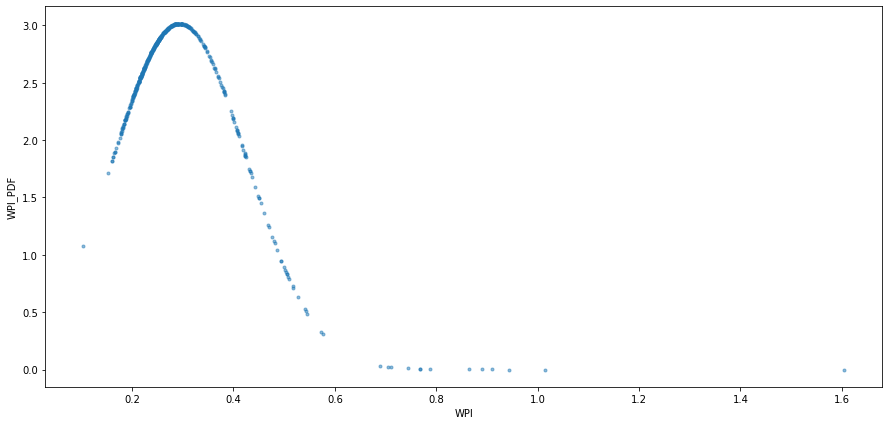

In [26]:
wpi = df['WPI']
wpi_pdf = np.zeros([487,1])
mu = np.mean(wpi)
sigma = np.std(wpi)
for i in range(0, 487):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wpi[i] - mu)/sigma, 2)/2)
    wpi_pdf[i] = x
plt.figure(figsize = (15,7))
plt.scatter(wpi, wpi_pdf, alpha = 0.5, marker = '.')
plt.xlabel('WPI')
plt.ylabel('WPI_PDF')

In [27]:
dfc = df[['pH', 'DO', 'TDS', 'Alkalinity', 'EC','Na','Ca','Mg','K','F','Cl','Nitrate','Sulphate','Phosphate','WPI']]
dfc.corr()


,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
pH,1.000000,0.210810,-0.236689,0.175553,-0.243444,-0.272732,-0.103705,-0.061892,-0.344660,-0.226388,-0.293404,-0.396623,-0.386443,-0.040080,-0.004345
DO,0.210810,1.000000,-0.225259,-0.038190,-0.228957,-0.182524,-0.186030,-0.069664,-0.270413,-0.232912,-0.177522,-0.142319,-0.293149,0.064680,-0.090860
TDS,-0.236689,-0.225259,1.000000,0.637826,0.984779,0.833350,0.892280,0.705540,0.754755,0.743923,0.841444,0.540387,0.831739,0.078610,0.509463
Alkalinity,0.175553,-0.038190,0.637826,1.000000,0.615121,0.381449,0.695824,0.658715,0.289611,0.361192,0.384181,0.095123,0.230219,-0.025287,0.307611
EC,-0.243444,-0.228957,0.984779,0.615121,1.000000,0.820788,0.880418,0.687685,0.745345,0.732394,0.825989,0.535274,0.834220,0.092540,0.515005
Na,-0.272732,-0.182524,0.833350,0.381449,0.820788,1.000000,0.634056,0.500394,0.709389,0.633075,0.973820,0.480286,0.660730,0.105519,0.437408
Ca,-0.103705,-0.186030,0.892280,0.695824,0.880418,0.634056,1.000000,0.586361,0.586509,0.623527,0.634912,0.414641,0.729817,0.040646,0.463969
Mg,-0.061892,-0.069664,0.705540,0.658715,0.687685,0.500394,0.586361,1.000000,0.463071,0.562444,0.526214,0.277253,0.538756,0.005573,0.332190
K,-0.344660,-0.270413,0.754755,0.289611,0.745345,0.709389,0.586509,0.463071,1.000000,0.633541,0.727638,0.600532,0.705231,0.065621,0.378211
F,-0.226388,-0.232912,0.743923,0.361192,0.732394,0.633075,0.623527,0.562444,0.633541,1.000000,0.651956,0.556749,0.713344,0.091178,0.478850


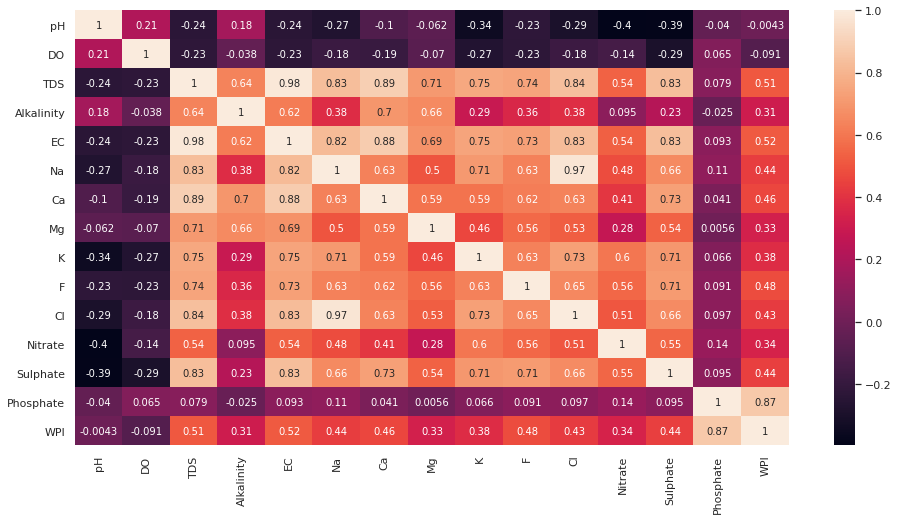

In [30]:
import seaborn as sns
sns.set()
%matplotlib inline
plt.figure(figsize = (16, 8))
sns.heatmap(dfc.corr(), annot = True)
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
ec_new = ec.values.reshape(-1, 1)
scaler = MinMaxScaler()
ec_minmax = scaler.fit_transform(ec_new)
print(ec_minmax)

[[1.23267327e-01]
 [2.22772277e-01]
 [7.42574257e-02]
 [7.17821782e-02]
 [1.03960396e-01]
 [1.73267327e-01]
 [3.68811881e-01]
 [1.33663366e-01]
 [2.07920792e-01]
 [2.62376238e-01]
 [2.05445545e-01]
 [8.91089109e-02]
 [1.21287129e-01]
 [1.16336634e-01]
 [1.00000000e+00]
 [2.00495050e-01]
 [3.46534653e-01]
 [3.46534653e-01]
 [3.31683168e-01]
 [2.77227723e-01]
 [2.00495050e-01]
 [2.67326733e-01]
 [2.82178218e-01]
 [1.95544554e-01]
 [2.15346535e-01]
 [9.65346535e-02]
 [1.53465347e-01]
 [2.00495050e-01]
 [8.66336634e-02]
 [2.15346535e-01]
 [6.93069307e-02]
 [1.23762376e-01]
 [7.17821782e-02]
 [1.33663366e-01]
 [1.73267327e-01]
 [2.47524752e-02]
 [3.46534653e-02]
 [1.98019802e-01]
 [1.73267327e-01]
 [1.18811881e-01]
 [7.42574257e-02]
 [1.01485149e-01]
 [7.52475248e-01]
 [1.83168317e-01]
 [1.43564356e-01]
 [1.43564356e-01]
 [2.32673267e-01]
 [2.64851485e-01]
 [1.75742574e-01]
 [2.02970297e-01]
 [2.02970297e-01]
 [1.70792079e-01]
 [1.08910891e-01]
 [1.03960396e-01]
 [1.23762376e-01]
 [6.388613

Text(0, 0.5, 'EC_PDF')

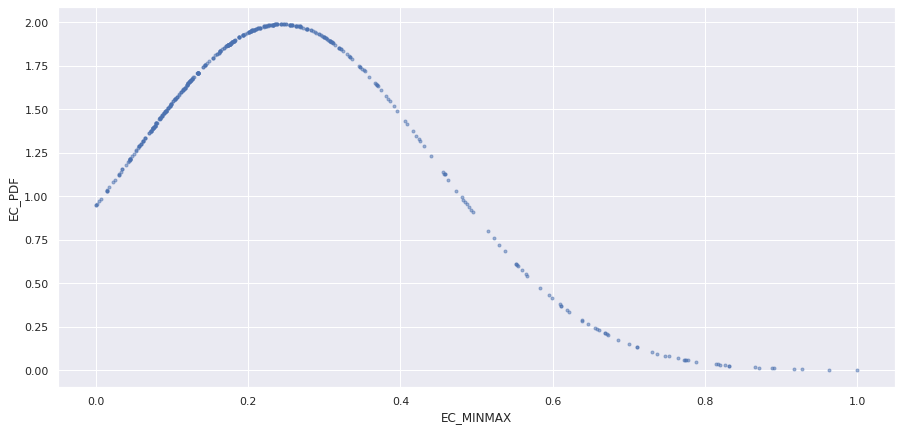

In [34]:
ec_pdf = np.zeros([487,1])

mu = np.mean(ec_minmax)
sigma = np.std(ec_minmax)

for i in range(0, 487):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ec_minmax[i] - mu)/sigma, 2)/2)
    ec_pdf[i] = x

plt.figure(figsize = (15,7))
plt.scatter(ec_minmax, ec_pdf, alpha = 0.5, marker = '.')
plt.xlabel('EC_MINMAX')
plt.ylabel('EC_PDF')

In [38]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [39]:
normalized_df



,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190,0.097276
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439,0.075203
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252,0.053492
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703,0.077124
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666,0.041510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.720461,0.150538,0.666667,0.000000,0.673267,0.302210,0.590909,0.268293,0.405251,0.736754,0.276835,0.138785,1.000000,0.008499,0.210614
483,0.634006,0.150538,0.833333,0.543210,0.831683,0.397964,0.621212,0.365854,0.535959,0.496834,0.389353,0.727893,0.581321,0.018697,0.219520
484,0.000000,0.172043,0.928571,0.024691,0.962871,0.761698,0.348485,0.512195,0.816210,0.033322,0.810504,0.952541,0.859482,0.092351,0.148769
485,0.662824,0.236559,0.690476,0.395062,0.710396,0.387132,0.424242,0.487805,0.562215,0.433522,0.418993,0.731644,0.460111,0.124079,0.270807


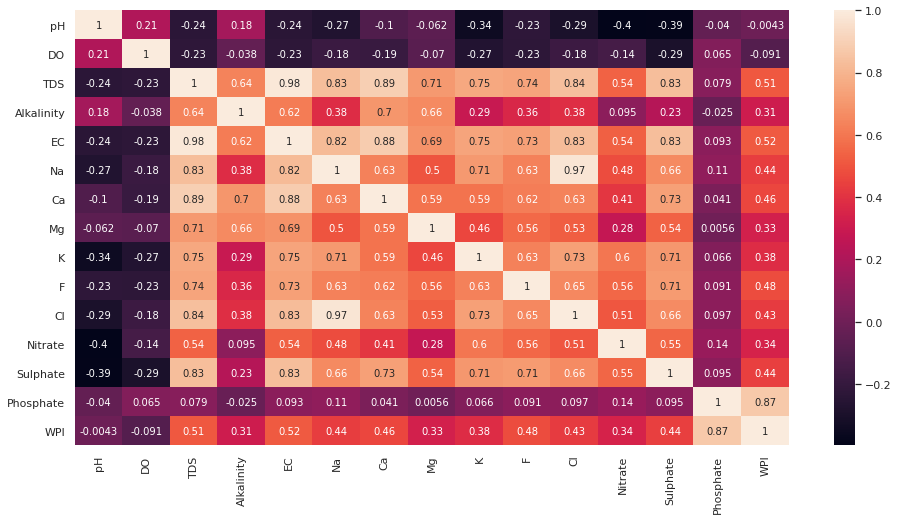

In [41]:


plt.figure(figsize = (16, 8))
sns.heatmap(normalized_df.corr(), annot = True)
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[4856560.31949538,
 1490816.9964362355,
 853129.5888082776,
 602310.749769396,
 458484.7748023794,
 400536.34253555676,
 355680.5708855615,
 332216.8599617452,
 305070.9235175131,
 288313.86621570296]

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

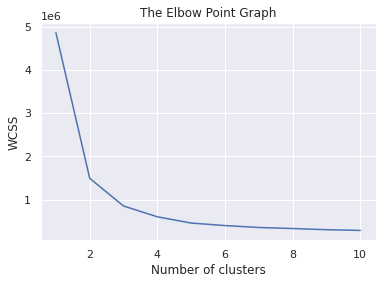

In [44]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-Cluster Sum of Square
plt.show()

In [45]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(df)
print(y)

[0 3 0 0 0 0 3 0 3 3 3 0 0 0 2 3 3 3 3 3 3 3 3 3 3 0 0 3 0 3 0 0 0 0 0 0 0
 3 0 0 0 0 2 0 0 0 3 3 0 3 3 0 0 0 0 1 2 2 2 1 0 0 3 3 3 1 1 3 1 1 1 1 1 3
 3 3 1 3 1 1 1 2 2 2 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 0 2 2 1 1 1 1 1 1 1 2 3
 3 0 0 0 1 3 3 1 3 1 3 3 3 1 3 3 3 1 3 1 1 1 2 1 1 3 3 3 3 3 1 1 1 3 3 3 3
 3 1 1 1 1 1 3 3 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 0 3 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 3 0
 0 0 0 0 0 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 0 0 3 3 3 3 0 0 3 3 0 0 0 3 0 0
 0 0 0 0 3 0 3 3 3 3 3 3 0 3 3 3 3 0 3 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 0 0 0 1 3 1 3
 3 0 0 1 0 0 3 0 3 3 3 1 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 3
 3 3 3 3 1 1 3 1 3 3 0 0 3 0 0 0 0 0 0 0 3 2 2 2 2 2 2 2 2 2 0 3 0 0 0 0 3
 0 3 3 3 3 3 0 0 3 0 0 0 3 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2]


In [46]:
df['Cluster'] = y

In [47]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,Cluster
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,0
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,3
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,0
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,0
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,0


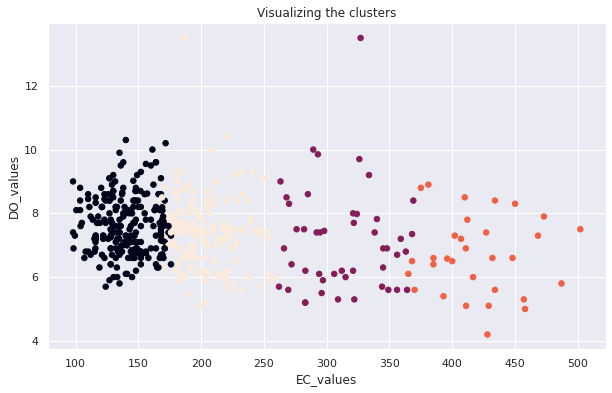

In [48]:
plt.figure(figsize = (10, 6))
plt.scatter(df['EC'], df['DO'], c = y, s = 30)
plt.xlabel('EC_values')
plt.ylabel('DO_values')
plt.title('Visualizing the clusters')
plt.show()

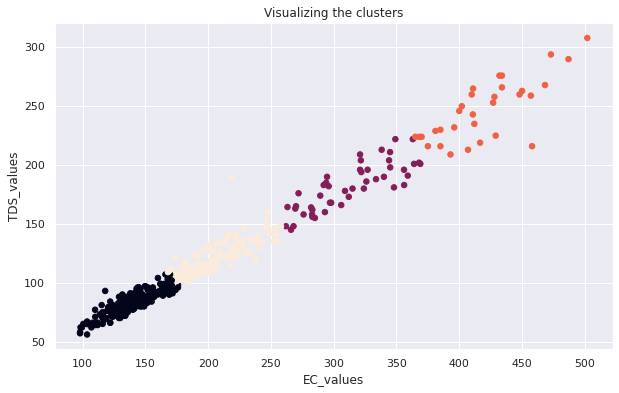

In [49]:
plt.figure(figsize = (10, 6))
plt.scatter(df['EC'], df['TDS'], c = y, s = 30)
plt.xlabel('EC_values')
plt.ylabel('TDS_values')
plt.title('Visualizing the clusters')
plt.show()

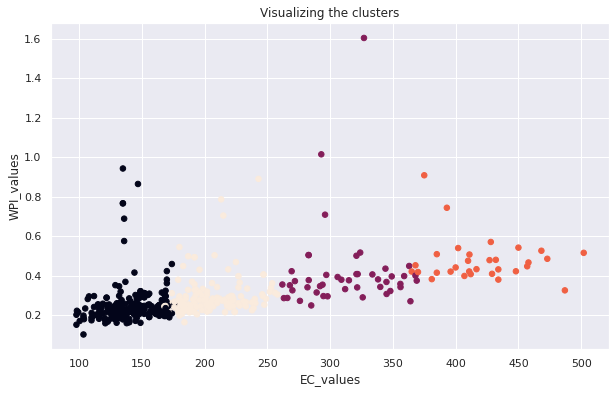

In [50]:
plt.figure(figsize = (10, 6))
plt.scatter(df['EC'], df['WPI'], c = y, s = 30)
plt.xlabel('EC_values')
plt.ylabel('WPI_values')
plt.title('Visualizing the clusters')
plt.show()

In [51]:
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

In [52]:
X = df.drop(['Cluster'], axis=1).values
y = df['Cluster'].values

In [53]:
X_test = X
y_test = y

In [54]:
n_classes = 4

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='rbf')
y_score_1 = cross_val_score(svm, X, y, cv=5)
svm_score = y_score_1.mean()
print(svm_score)

0.9835472333263201


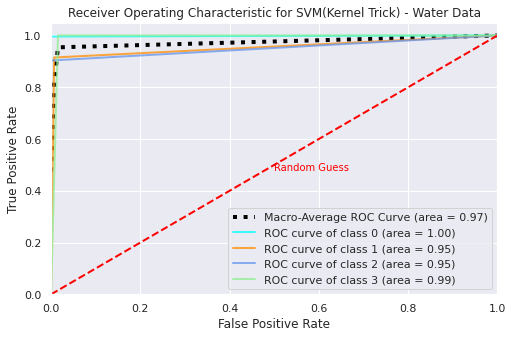

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(svm, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"], alpha = 1.0,
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM(Kernel Trick) - Water Data')
plt.legend(loc="lower right")
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
y_score_2 = cross_val_score(lreg, X, y, cv=5)
lreg_score = y_score_2.mean()
print(lreg_score)

0.8253524090048391


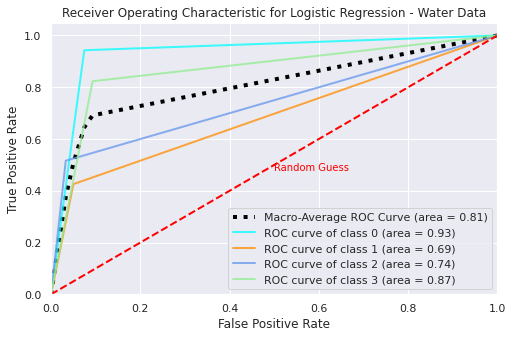

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(lreg, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression - Water Data')
plt.legend(loc="lower right")
plt.show()

Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_score_3 = cross_val_score(gnb, X, y, cv=5)
gnb_score = y_score_3.mean()
print(gnb_score)

0.911908268462024


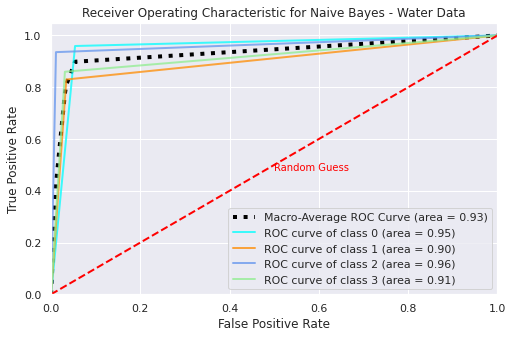

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(gnb, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - Water Data')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, X, y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.9794866400168315


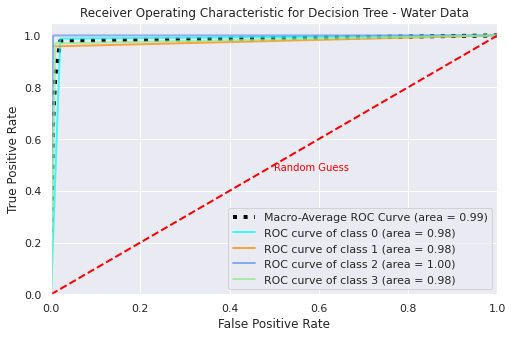

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(dtc, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree - Water Data')
plt.legend(loc="lower right")
plt.show()

Algorithm Comparision

In [64]:
classifiers = ['SVM_Kernel', 'Logistic_Regression', 'Naive_Bayes', 'Decision_Tree']
accuracies = [svm_score*100, lreg_score*100, gnb_score*100, dtc_score*100]
comparision = pd.DataFrame({'Classifier':classifiers,'Accuracy':accuracies}, index = [i for i in range(1,5)])
comparision

,Classifier,Accuracy
1,SVM_Kernel,98.354723
2,Logistic_Regression,82.535241
3,Naive_Bayes,91.190827
4,Decision_Tree,97.948664
